In [20]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from IPython.display import display
os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')
from MHS.F_model_training import *


In [100]:
df_cv_org = pd.read_csv("/media/fruitspec-lab/cam175/customers_new/features_1308_new_translator.csv")
df_cv_org

,Unnamed: 0,total_foliage,total_orange,width,height,volume,surface_area,perimeter,avg_width,avg_height,...,cv,cv1,cv2,cv3,cv4,cv5,block_name,name,customer,cont
0,0,121.197176,2.193163,2.698580,3.662066,6.981767,6.716055,5.278098,2.293109,2.742305,...,283,283,218,188,173,156,DWDBCL46,R203_S1_T1,DEWAGD,NaN
1,1,141.728919,1.861267,2.621310,3.149426,5.665482,3.675360,2.589877,2.300400,2.837043,...,248,248,183,156,146,136,DWDBCL46,R203_S2_T1,DEWAGD,NaN
2,2,161.993857,1.517138,2.659224,3.708786,6.866103,3.984093,2.936604,2.288443,3.314990,...,158,158,119,105,96,85,DWDBCL46,R21_S1_T1,DEWAGD,NaN
3,3,153.789183,1.884458,2.683011,3.416385,6.438434,3.458153,3.079964,2.343283,3.005899,...,173,173,141,131,115,105,DWDBCL46,R21_S2_T1,DEWAGD,NaN
4,4,156.639359,2.846400,2.849478,3.760399,7.993428,4.199263,3.035079,2.710563,2.808083,...,290,290,214,194,179,160,DWDBCL46,R23_S1_T1,DEWAGD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1099,41.094979,1.016776,2.029849,2.149801,2.318965,3.234597,2.167204,1.755722,1.756515,...,55,55,35,31,25,22,SUMGLD,R9_S1_T45,SHANIR,NaN
1100,1100,72.971416,1.829669,3.250959,2.383060,6.593659,3.506743,2.830342,2.982827,1.939560,...,84,84,60,48,41,38,SUMGLD,R9_S1_T46,SHANIR,NaN
1101,1101,54.737655,1.126030,2.230621,2.229724,2.904498,3.565306,2.365303,1.660924,1.815551,...,64,64,44,37,30,23,SUMGLD,R9_S1_T47,SHANIR,NaN
1102,1102,59.176816,0.672317,2.114065,2.435368,2.849507,3.169792,1.928470,1.620145,1.867314,...,45,45,18,17,14,11,SUMGLD,R9_S1_T48,SHANIR,NaN


# unrelated- testing for new feature: cv decay rate

In [225]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
f_df = read_f_df(cfg)
df_cv_w_f = add_fs(df_cv, f_df).reset_index(drop = True)
plot_fruit_var = get_plot_fruit_variety_df(cfg)
df_cv_w_f = pd.merge(df_cv_w_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")

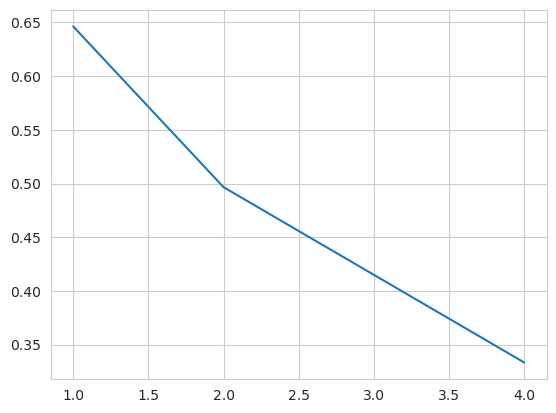

<AxesSubplot: xlabel='decay_rate', ylabel='% hidden'>

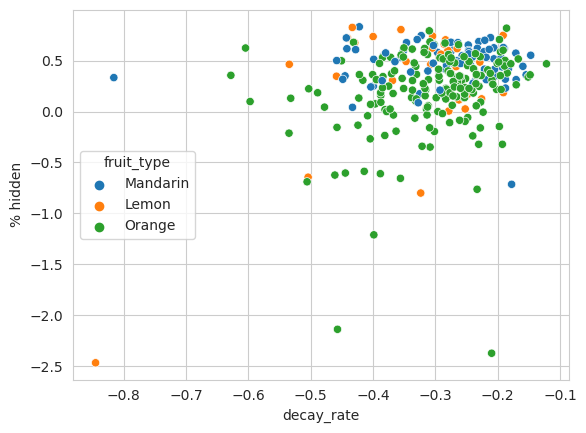

In [235]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# df_cv_w_f["% hidden"] = (df_cv_w_f["F"] - df_cv_w_f["cv1"])/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4], [x["cv2/cv1"], x["cv3/cv1"], x["cv4/cv1"], x["cv5/cv1"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")


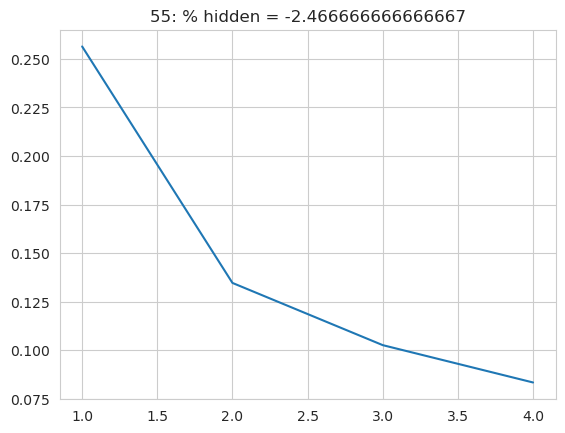

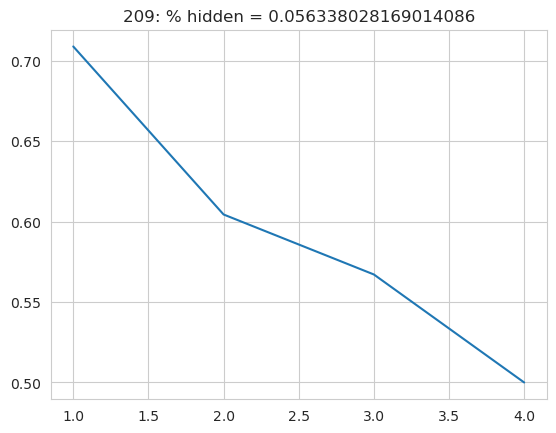

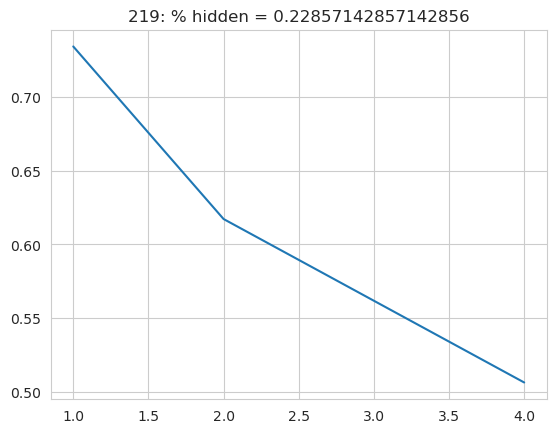

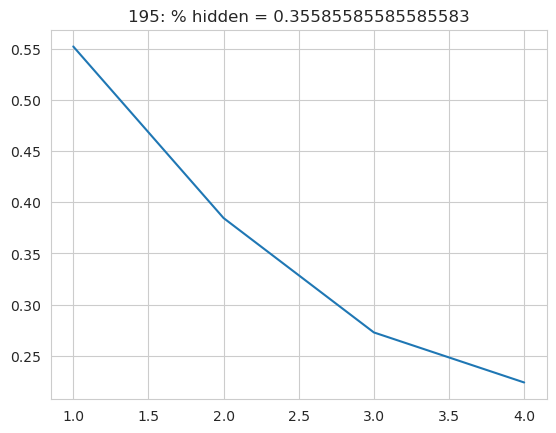

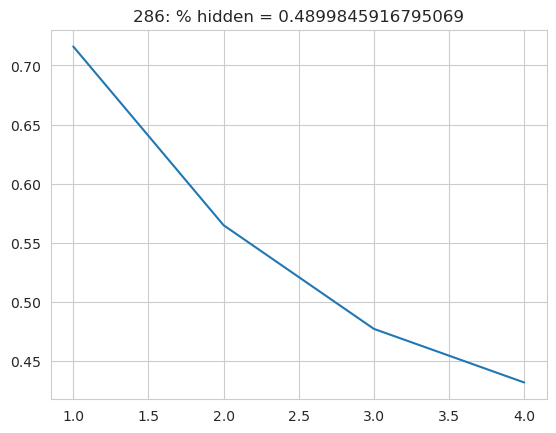

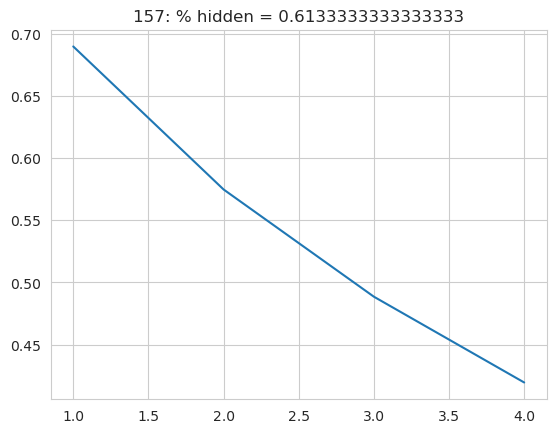

In [232]:
# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

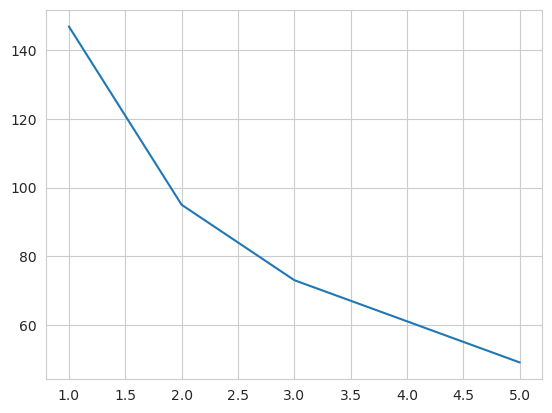

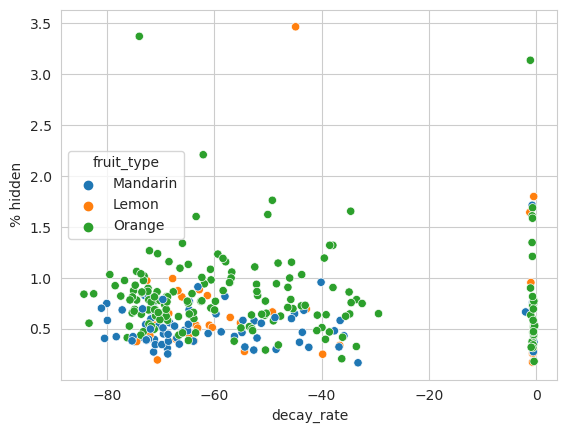

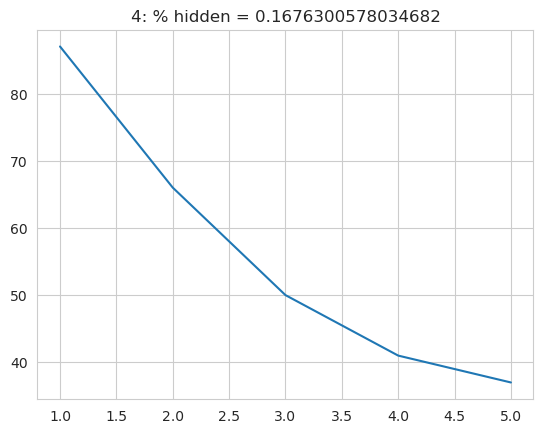

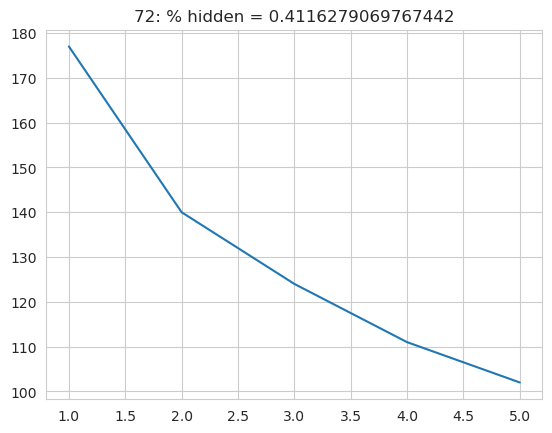

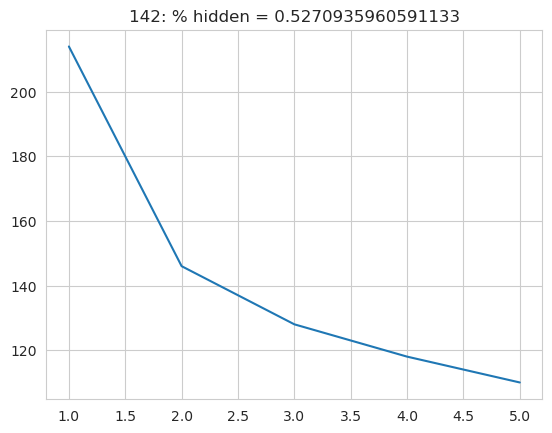

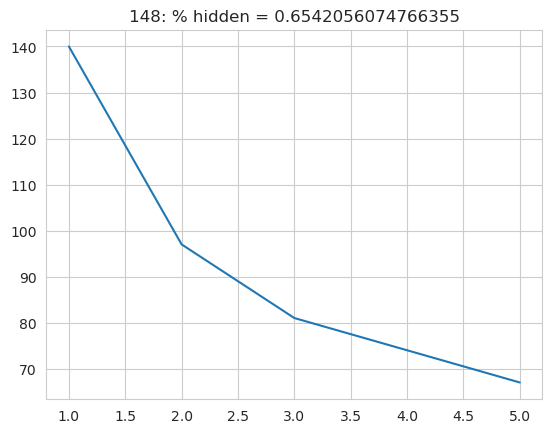

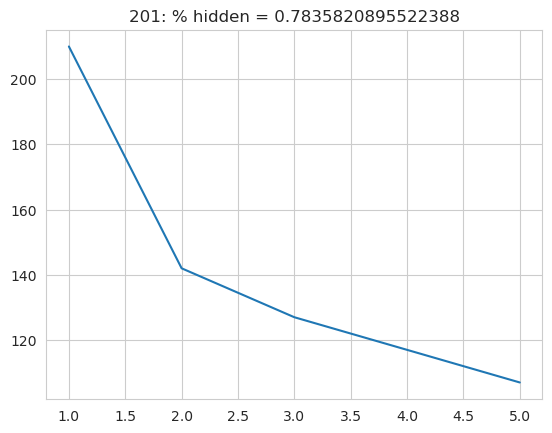

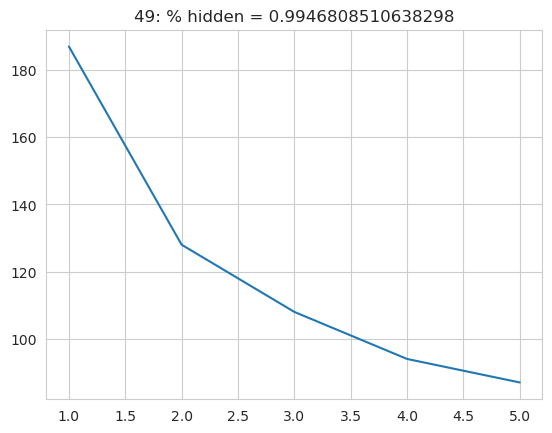

In [241]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# cv_ratio_cols = ["cv1","cv2", "cv3", "cv4", "cv5"]
# df_cv_w_f["% hidden"] = df_cv_w_f["cv1"]/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4,5], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4,5], [x["cv1"], x["cv2"], x["cv3"], x["cv4"], x["cv5"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")
# plt.show()

# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4,5], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

## filter

In [191]:
df_cv = df_cv_org[df_cv_org["customer"].isin(["DEWAGD", "PROPAL"])] #, "FOWLER", "MOTCHA"
df_cv = df_cv[df_cv["name"].str.endswith("1") | df_cv["customer"].isin(["FOWLER", "MOTCHA"])]
df_cv["block_name"] = df_cv["block_name"].replace({"2020injx": "2020injX", "injertos": "Injertos"})

## Add Fs

In [192]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
cfg.drop_customer: ["MOTCHADS"]
f_df = read_f_df(cfg)

### handling motcha and fowler

In [193]:
f_df_serinal = f_df[~f_df["tree_serial"].isna()]
base_tree_name = f_df_serinal["block_name"] + "_" + "R0_T" + f_df_serinal["tree_serial"].astype(int).astype(str)
tree_new_name = base_tree_name + "_S" + f_df_serinal["side"].astype(int).astype(str)
tree_new_name = tree_new_name.apply(lambda x: f'{x.split("_")[1]}_{x.split("_")[3]}_{x.split("_")[2]}')
f_df_serinal["base_tree_name"] = base_tree_name
f_df_serinal["tree_new_name"] = tree_new_name
# f_df.loc[~f_df["tree_serial"].isna(), "new_tree_name"] = f_df_serinal["tree_new_name"]


### adding

In [194]:
df_f = add_fs(df_cv, f_df)

In [195]:
plot_fruit_var = get_plot_fruit_variety_df(cfg)
df_f = pd.merge(df_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")
hidden_range, cv_range, F_range, fruits_exclude = get_ranges(cfg)
df_f = process_fruit_type(df_f, fruits_exclude, cfg)

In [196]:
df_f["full_name"] = df_f["customer"] + df_f["block_name"] + df_f["name"]

In [197]:
f_df_serinal["full_name"] = f_df_serinal["customer_name"] + f_df_serinal["block_name"] + f_df_serinal["new_tree_name"]
df_f.loc[df_f["customer"].isin(["FOWLER", "MOTCHA"]), "name"] = df_f[df_f["customer"].isin(["FOWLER", "MOTCHA"])]["full_name"].map(dict(zip(f_df_serinal["full_name"], f_df_serinal["tree_new_name"])))



## Rename trees

In [198]:
cv_cols = ["cv1", "cv2", "cv3", "cv4" ,"cv5"]

In [199]:
df_f["base_tree_name"] = df_f["block_name"] + "_"  + df_f["name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[-1])
counts = df_f["base_tree_name"].value_counts()>1
df_f = df_f[df_f["base_tree_name"].map(dict(zip(counts.index, counts.values)))]

In [200]:
df_f["side"] = df_f["name"].str.contains("S1")*1 +1

In [201]:
grouped_trees = df_f.groupby("base_tree_name")[cv_cols + ["F", "lemon", "mandarin"]].mean()
grouped_trees[cv_cols] = grouped_trees[cv_cols]*2
grouped_trees["base_tree_name"] = list(grouped_trees.index)
grouped_trees["block_name"] = grouped_trees["base_tree_name"].apply(lambda x: x.split("_")[0])


In [202]:
## checking for difference between sides

In [203]:
from scipy.stats import ttest_1samp
df_f_org = df_f.reset_index(drop=True)
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]
df_f_grp_by = df_f_org.groupby(["block_name", "side"])[cv_F_cols].mean()
df_f_grp_by.reset_index(inplace=True)
res = pd.DataFrame()
pv = []
stat = []
for cv in range(1,6):
    df_pivot = df_f_grp_by.pivot_table(index='block_name', columns='side', values=f'cv{cv}/F')
    abs_diff = np.abs(df_pivot[2]-df_pivot[1])
    ttest_res = ttest_1samp(abs_diff, 0)
    pv.append(ttest_res[1])
    stat.append(ttest_res[0])
    res[f'cv{cv}/F'] = abs_diff

display(res)
display(pd.concat([pd.DataFrame(res.mean()), pd.DataFrame(res.std())], axis = 1))
pd.DataFrame({"t-statistic": stat, "pvalue": pv}, index = cv_F_cols)

,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F
block_name,,,,,
2004XXXX,0.153782,0.161697,0.145129,0.147247,0.146150
2005XXXX,0.033466,0.001323,0.021906,0.031071,0.033328
2018NINA,0.021445,0.042776,0.059832,0.080112,0.068156
2018XXXX,0.003458,0.077473,0.117048,0.120462,0.126656
94000000,0.360614,0.352563,0.361741,0.346724,0.313329
DWDBCL46,0.007771,0.012215,0.021770,0.021293,0.016109
DWDBCN51,0.071444,0.051496,0.042979,0.049579,0.045480
DWDBLE33,0.003286,0.010400,0.010461,0.019362,0.022752
DWDBLE34,0.009549,0.010057,0.025095,0.025744,0.027232


,0,0
cv1/F,0.135189,0.152671
cv2/F,0.089684,0.082565
cv3/F,0.083269,0.075118
cv4/F,0.081194,0.067694
cv5/F,0.076309,0.062391


,t-statistic,pvalue
cv1/F,4.515147,0.000131
cv2/F,5.538673,0.000009
cv3/F,5.652302,0.000007
cv4/F,6.115943,0.000002
cv5/F,6.236454,0.000002


# F_modeling

### Load data

In [204]:
df_f_org = grouped_trees.reset_index(drop=True)

In [205]:
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [206]:
# df_f_org.to_csv(f"{df_f_path.split('.')[0]}_cvf.csv")

### Short EDA

In [207]:
df_f_org[cv_F_cols].mean().round(2)

cv1/F    1.45
cv2/F    0.96
cv3/F    0.80
cv4/F    0.70
cv5/F    0.62
dtype: float64

In [208]:
df_f_org.groupby(["block_name"])[cv_F_cols].mean()

,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F
block_name,,,,,
2004XXXX,1.037828,0.702150,0.591997,0.522580,0.465639
2005XXXX,1.494906,1.002980,0.841489,0.711239,0.610172
2018NINA,1.753254,1.191662,0.995487,0.877572,0.793808
2018XXXX,1.748416,1.232463,1.003169,0.886693,0.799136
94000000,1.703938,1.185003,1.012352,0.906090,0.806802
DWDBCL46,0.794947,0.583584,0.495324,0.435075,0.392019
DWDBCN51,1.185546,0.801922,0.675186,0.588698,0.532303
DWDBLE33,1.141830,0.855609,0.738436,0.647790,0.585368
DWDBLE34,1.266248,0.941515,0.843674,0.752399,0.683183


In [209]:
df_f_org.groupby(["block_name"])["cv1", "cv2"].count()

,cv1,cv2
block_name,,
2004XXXX,5,5
2005XXXX,6,6
2018NINA,5,5
2018XXXX,8,8
94000000,6,6
DWDBCL46,8,8
DWDBCN51,5,5
DWDBLE33,3,3
DWDBLE34,2,2


### CV-F graphs

<Figure size 1000x600 with 0 Axes>

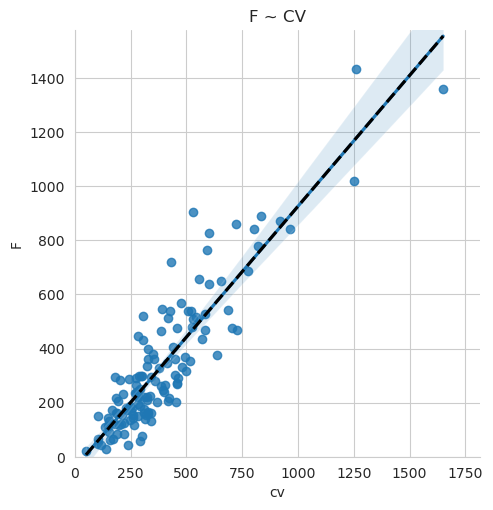

In [210]:

df = df_f_org.copy()
col = 'cv1'
max_val = np.min(np.max(df[[col, "F"]].values, axis=0))

plt.figure(figsize=(10, 6))  # Adjust figure size

# Enable grid lines
sns.set_style("whitegrid")

ax = sns.lmplot(data=df, x=col, y="F", palette="Blues")  # Customize color palette
sns.regplot(data=df, x=col, y="F", scatter_kws={'s': 5}, order=1, ci=0, ax=ax.axes[0, 0],
            x_ci=0, color="black", line_kws={"ls": "--"},scatter=False)  # Adjust scatter marker size and line style

plt.xlim(0, np.max(df[col] * 1.1))  # Adjust x-axis limits
plt.ylim(0, np.max(df["F"] * 1.1))  # Adjust y-axis limits

plt.xlabel("cv")  # Set x-axis label
plt.ylabel("F")  # Set y-axis label
plt.title("F ~ CV")  # Set plot title

plt.show()

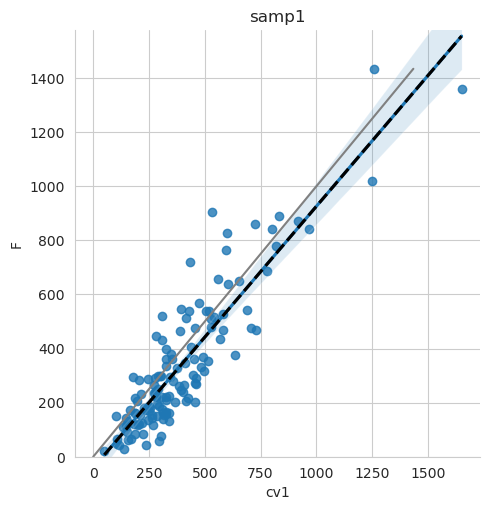

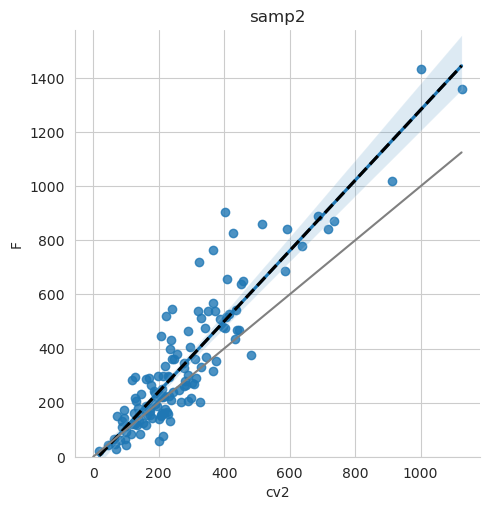

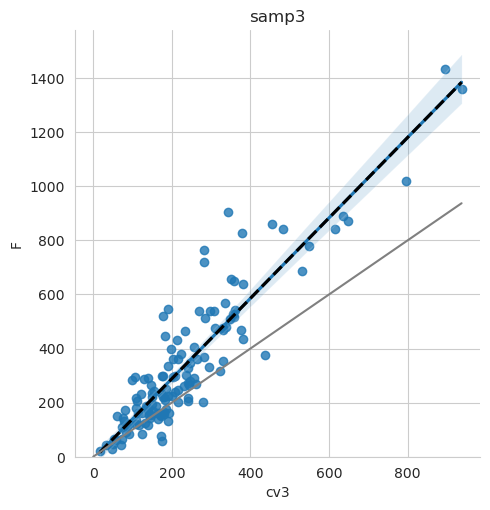

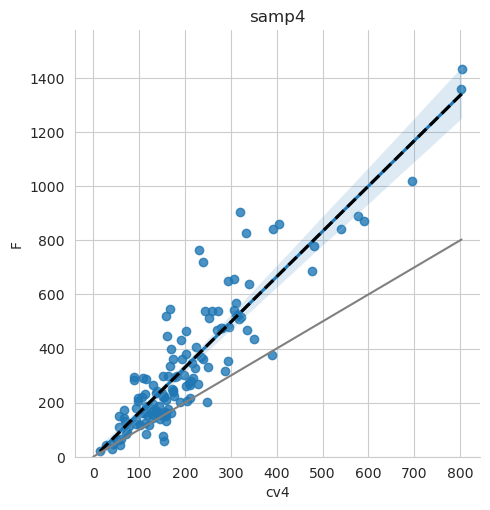

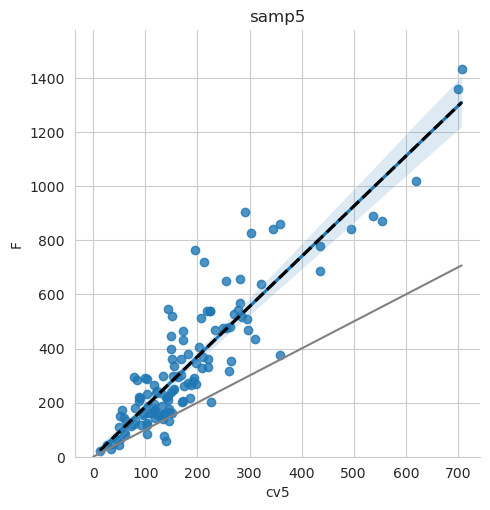

In [211]:
def plot_F_cv(df,min_samp = "", hue = None, title= "", col = ""):
    if col == "":
        col = f"cv{min_samp}"
    max_val = np.min(np.max(df[[col, "F"]].values, axis = 0))
    ax = sns.lmplot(data = df, x = col, y="F", hue = hue)
    sns.regplot(data = df, x = col, y="F", scatter_kws={'s':2}, order = 1,ci=0, ax=ax.axes[0,0],
               x_ci = 0, color = "black", line_kws={"ls":"--"},scatter=False)
    plt.plot([0, max_val], [0, max_val], color='grey')
    plt.ylim(0, np.max(df["F"]*1.1))
    plt.title(title)
    plt.show()

for i in range(1,6)    :
    plot_F_cv(df_f_org,i, title = f"samp{i}")
    

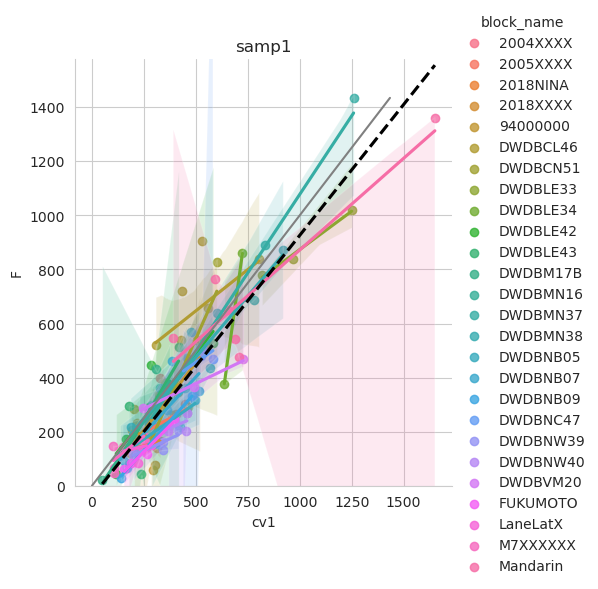

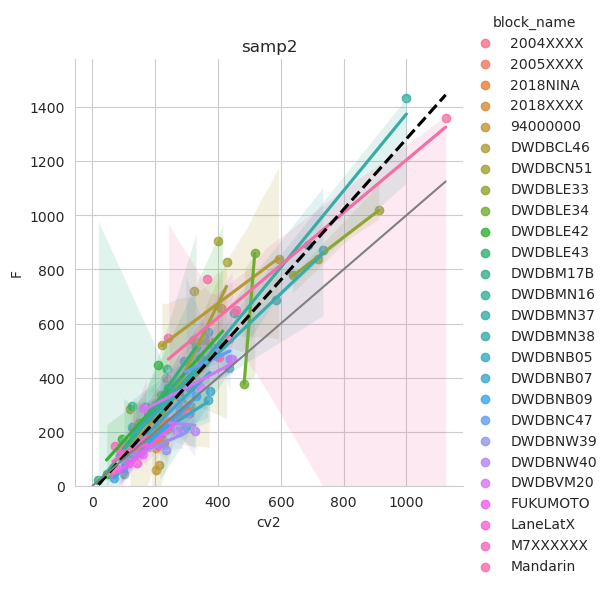

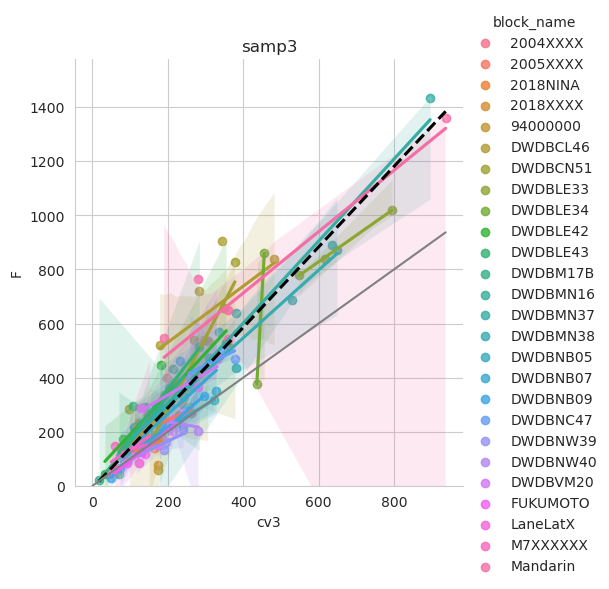

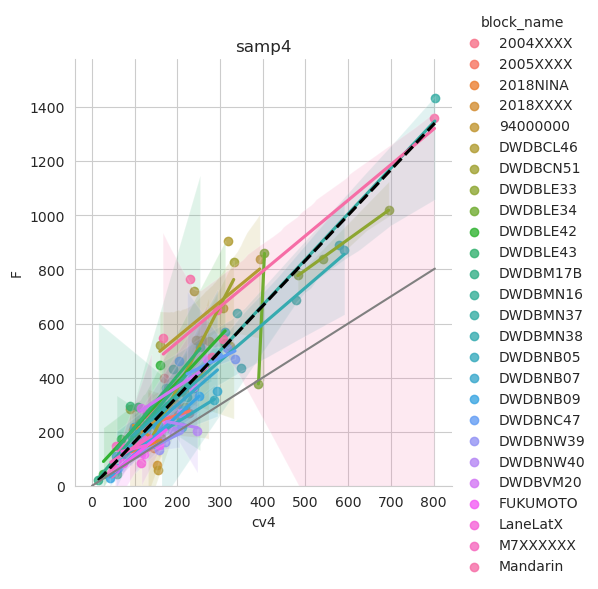

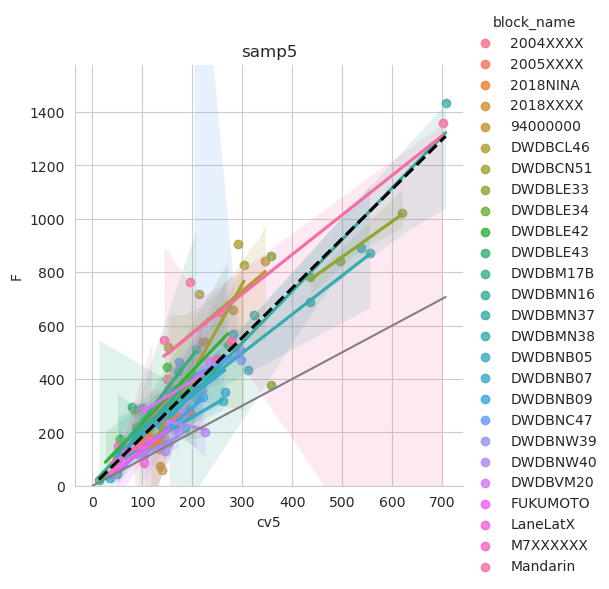

In [212]:
for i in range(1,6):
    plot_F_cv(df_f_org,i,"block_name", f"samp{i}")

### Modeling

In [213]:
import sys
sys.path.append(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')

from MHS.scoring import cross_validate_with_mean
from sklearn.linear_model import LinearRegression, PoissonRegressor

class MaxLinearRegressor(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
    
    def predict(self, X):
        predicted_values = super().predict(X)
        return np.array([max(p, 0) for p in predicted_values])

In [214]:
def get_model_res(df, cv=1, include_fruits = True, include_interaction=True, group_col = "block_name"):
    groups = df[group_col]
    if include_fruits:
        X = df[[f"cv{cv}", "lemon", "mandarin"]]
        if include_interaction:
            X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
            X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
    else:
        X = df[[f"cv{cv}"]]
    y = df["F"]
    model = LinearRegression(fit_intercept = False)
    gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res=True)
    return gr_res, ge_std, tree_res, tree_std, preds

In [215]:
results_list = []
include_fruits = True
include_interaction=True
for include_fruits in [True, False]:
    for include_interaction in [True, False]:
        for cv in range(1,6):
            df = grouped_trees.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "2_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            df = df_f.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "1_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
summary_res = pd.DataFrame(results_list)   
summary_res

true: 1443.0,    pred: 1550.0363362480084. (7.42 %) (2018XXXX)
true: 5240.0,    pred: 3984.9323706573878. (23.95 %) (DWDBCL46)
true: 4340.0,    pred: 5039.970893167571. (16.13 %) (Mandarin)
true: 732.0,    pred: 629.8743973691776. (13.95 %) (M7XXXXXX)
true: 845.0,    pred: 938.5049768273605. (11.07 %) (LaneLatX)
true: 1503.0,    pred: 1600.567209270915. (6.49 %) (2005XXXX)
true: 1770.0,    pred: 1402.9241363298192. (20.74 %) (94000000)
true: 747.0,    pred: 924.1461073975249. (23.71 %) (2018NINA)
true: 1998.0,    pred: 2254.571609131304. (12.84 %) (DWDBCN51)
true: 1379.0,    pred: 1391.0040493459794. (0.87 %) (DWDBLE42)
true: 1381.0,    pred: 1358.5699426870237. (1.62 %) (DWDBLE43)
true: 1258.0,    pred: 1557.6066341579196. (23.82 %) (DWDBM17B)
true: 1677.0,    pred: 1966.072045229264. (17.24 %) (DWDBMN16)
true: 3949.0,    pred: 3620.1252263663823. (8.33 %) (DWDBMN37)
true: 2314.0,    pred: 2558.737914671054. (10.58 %) (DWDBMN38)
true: 1113.0,    pred: 1220.2374745213885. (9.63 %) (DWD

true: 744.0,    pred: 1136.3890876095088. (52.74 %) (DWDBNW39)
true: 662.0,    pred: 912.6913294899041. (37.87 %) (FUKUMOTO)
true: 1493.0,    pred: 1116.8637710558246. (25.19 %) (2004XXXX)
true: 1866.0,    pred: 1642.386712827289. (11.98 %) (DWDBNC47)
true: 913.0,    pred: 1265.1025149906686. (38.57 %) (DWDBNW40)
true: 2640.0,    pred: 2710.4742685310803. (2.67 %) (DWDBLE33)
true: 1121.0,    pred: 1039.1668734861273. (7.30 %) (DWDBVM20)
true: 1236.0,    pred: 1231.6630100284701. (0.35 %) (DWDBLE34)
0.3823264238405296 0.32313864763638817
true: 2886.0,    pred: 3184.3521233362117. (10.34 %) (2018XXXX)
true: 10480.0,    pred: 8168.202732485986. (22.06 %) (DWDBCL46)
true: 8680.0,    pred: 7945.065997255593. (8.47 %) (Mandarin)
true: 1464.0,    pred: 1259.7414295463582. (13.95 %) (M7XXXXXX)
true: 1690.0,    pred: 1742.6792116408358. (3.12 %) (LaneLatX)
true: 3006.0,    pred: 3134.2132769399163. (4.27 %) (2005XXXX)
true: 3540.0,    pred: 2945.2242090153486. (16.80 %) (94000000)
true: 1494.0,

true: 1677.0,    pred: 1567.6626867270907. (6.52 %) (DWDBMN16)
true: 3949.0,    pred: 3254.2637395389993. (17.59 %) (DWDBMN37)
true: 2314.0,    pred: 2155.5083864032913. (6.85 %) (DWDBMN38)
true: 1113.0,    pred: 1541.1279718649976. (38.47 %) (DWDBNB05)
true: 1177.0,    pred: 1339.3110069816264. (13.79 %) (DWDBNB07)
true: 799.0,    pred: 1266.7625193543215. (58.54 %) (DWDBNB09)
true: 744.0,    pred: 1359.1860704366686. (82.69 %) (DWDBNW39)
true: 662.0,    pred: 1154.7839686919083. (74.44 %) (FUKUMOTO)
true: 1493.0,    pred: 1348.0332185894063. (9.71 %) (2004XXXX)
true: 1866.0,    pred: 1847.4591264548253. (0.99 %) (DWDBNC47)
true: 913.0,    pred: 1510.2464899678957. (65.42 %) (DWDBNW40)
true: 2640.0,    pred: 2711.727002326717. (2.72 %) (DWDBLE33)
true: 1121.0,    pred: 1311.656480920617. (17.01 %) (DWDBVM20)
true: 1236.0,    pred: 1209.1010061126585. (2.18 %) (DWDBLE34)
0.4380180912014918 0.28789637451594907
true: 2886.0,    pred: 3817.823067495802. (32.29 %) (2018XXXX)
true: 10480.0,

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std,include_fruits,include_interaction
0,2_sided,1,0.167962,0.113204,0.387880,0.287163,True,True
1,1_sided,1,0.172497,0.106337,0.448067,0.364745,True,True
2,2_sided,2,0.149250,0.109381,0.338146,0.233830,True,True
3,1_sided,2,0.154184,0.105762,0.411244,0.325104,True,True
4,2_sided,3,0.157264,0.106302,0.336850,0.246355,True,True
5,1_sided,3,0.158475,0.110560,0.417889,0.345937,True,True
6,2_sided,4,0.158209,0.104154,0.341431,0.252927,True,True
7,1_sided,4,0.161032,0.108253,0.427225,0.360259,True,True
8,2_sided,5,0.166264,0.101532,0.344403,0.257945,True,True
9,1_sided,5,0.167383,0.108222,0.434596,0.372184,True,True


In [216]:
summary_res.iloc[:10, :-2].round(2)

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std
0,2_sided,1,0.17,0.11,0.39,0.29
1,1_sided,1,0.17,0.11,0.45,0.36
2,2_sided,2,0.15,0.11,0.34,0.23
3,1_sided,2,0.15,0.11,0.41,0.33
4,2_sided,3,0.16,0.11,0.34,0.25
5,1_sided,3,0.16,0.11,0.42,0.35
6,2_sided,4,0.16,0.10,0.34,0.25
7,1_sided,4,0.16,0.11,0.43,0.36
8,2_sided,5,0.17,0.10,0.34,0.26
9,1_sided,5,0.17,0.11,0.43,0.37


In [217]:
# cv = 1
# df = grouped_trees.copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)


In [218]:
# df = df_f.reset_index(drop=True).copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)